In [33]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

In [34]:
from PIL import Image

In [35]:
import math

In [36]:
dataDir = "../dataset/tiny_set/erase_with_uncertain_dataset/"

In [61]:
annFile = '../dataset/tiny_set/erase_with_uncertain_dataset/annotations/corner/task/tiny_set_train_sw640_sh512_all_2x.json'

In [62]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


In [63]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
person



In [64]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds();

In [65]:
len(imgIds)

8256

In [66]:
imgIds = coco.getImgIds(imgIds = [20])
img = coco.loadImgs(imgIds)[0]

In [78]:
I = Image.open(f"{dataDir}/train_2x/{img['file_name']}").convert('RGB')

In [79]:
I = I.crop(img['corner'])

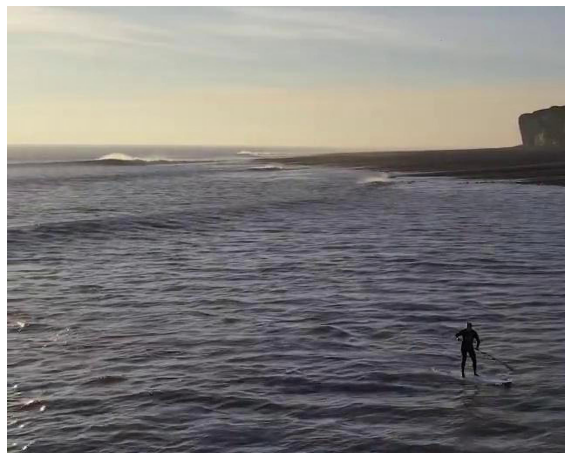

In [80]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
plt.axis('off')
plt.imshow(I)
plt.show()

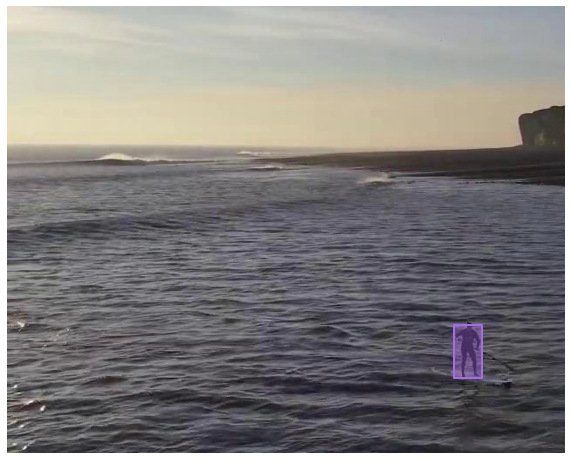

In [81]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [82]:
anns

[{'segmentation': [[1024.2750244140625,
    729.7958984375,
    1024.2750244140625,
    852.5026626586914,
    1089.2374267578125,
    852.5026626586914,
    1089.2374267578125,
    729.7958984375]],
  'bbox': [1024.2750244140625,
   729.7958984375,
   64.96240234375,
   122.7067642211914],
  'category_id': 1,
  'area': 3985.6630938183516,
  'iscrowd': 0,
  'image_id': 20,
  'id': 195,
  'ignore': False,
  'uncertain': False,
  'logo': False,
  'in_dense_image': False,
  'size': 89.2822837277178}]

In [10]:
ann_ids = coco.getAnnIds()

In [11]:
anns = coco.loadAnns(ann_ids)

In [16]:
objs = np.array(list(map(lambda x: x['image_id'], anns)))

In [19]:
vals, count = np.unique(objs, return_counts=True)

<BarContainer object of 3206 artists>

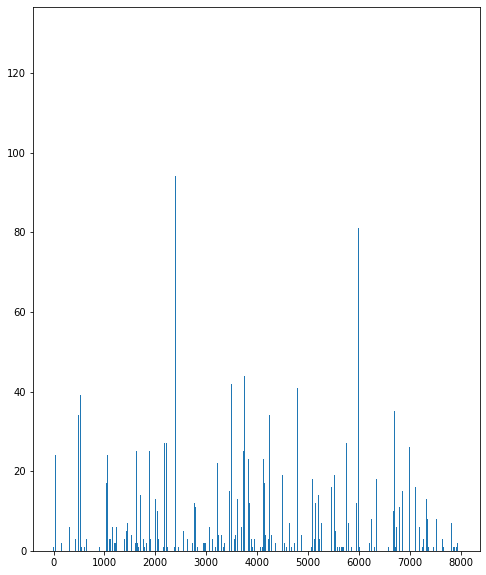

In [20]:
plt.bar(vals, count)

In [11]:
heights = []
widths = []
for i in coco.imgs:
    img = coco.imgs[i]
    heights.append(img['height'])
    widths.append(img['width'])

In [13]:
from scipy import stats

In [14]:
stats.describe(heights)

DescribeResult(nobs=8256, minmax=(497, 640), mean=600.3820251937984, variance=3501.1039482178994, skewness=-0.82404672574433, kurtosis=-1.3205461608428917)

In [15]:
stats.describe(widths)

DescribeResult(nobs=8256, minmax=(512, 640), mean=551.5658914728682, variance=3499.3982017006365, skewness=0.8261446891807805, kurtosis=-1.3174849525383916)